# *Womens E-Commerce Clothing Reviews *


### Data Dictionary
The dataset was retrieved from: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. The dataset was taken from real commercial data and has been anonymized along with replacing the company's name in the review text and body to  “retailer”. There are 23486 orders and 10 different features containing categorical and numerical data, which are explained in detail below. 

1) Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

2) Age: Positive Integer variable of the reviewers age.

3) Title: String variable for the title of the review.

4) Review Text: String variable for the review body.

5) Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

6) Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended. This will be our target variable. 

7) Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

8) Division Name: Categorical name of the product high level division.

9) Department Name: Categorical name of the product department name.

10) Class Name: Categorical name of the product class name.


### 1. Importing Packages 


In [195]:
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [196]:
df = pd.read_csv('WomensClothing ECommerceReviews.csv')
df.head()

,Clothing_ID,Age,Title,Review Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [197]:
print(df.shape)

(23486, 10)


In [198]:
df.isnull().any()

Clothing_ID                False
Age                        False
Title                       True
Review Text                 True
Rating                     False
Recommended_IND            False
Positive_Feedback_Count    False
Division_Name               True
Department_Name             True
Class_Name                  True
dtype: bool

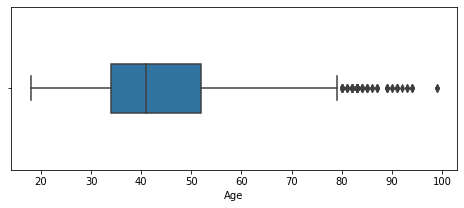

In [199]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Age'], width=0.3)

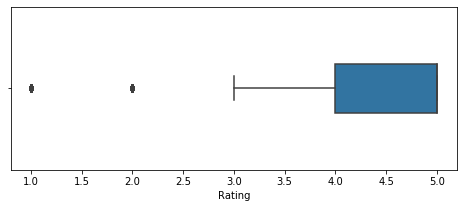

In [200]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Rating'], width=0.3)

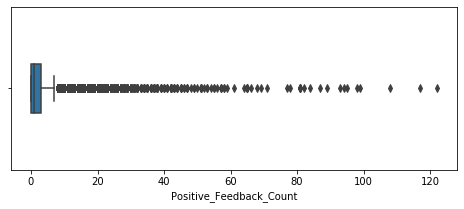

In [201]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Positive_Feedback_Count'], width=0.3)

In [202]:
df.drop('Title',axis=1,inplace=True)

In [203]:
df.drop('Review Text',axis=1,inplace=True)

In [204]:
df.head()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,767,33,4,1,0,Initmates,Intimate,Intimates
1,1080,34,5,1,4,General,Dresses,Dresses
2,1077,60,3,0,0,General,Dresses,Dresses
3,1049,50,5,1,0,General Petite,Bottoms,Pants
4,847,47,5,1,6,General,Tops,Blouses


In [205]:
le = LabelEncoder()
y = le.fit_transform(df['Recommended_IND'])

In [206]:
x1 = le.fit_transform(df['Division_Name'].astype(str))
df['Division_Name'] = x1

In [207]:
x2 = le.fit_transform(df['Department_Name'].astype(str))
df['Department_Name'] = x2

In [208]:
x3 = le.fit_transform(df['Class_Name'].astype(str))
df['Class_Name'] = x3

In [209]:
scale = StandardScaler()
scaled_df = scale.fit_transform(df)
scaled_df.shape

(23486, 8)

In [112]:
df.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936,0.475432,2.360385,6.942476
std,203.298980,12.279544,1.110031,0.382216,5.702202,0.617167,1.633476,5.217702
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,0.000000,1.000000,3.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,0.000000,2.000000,7.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,1.000000,4.000000,10.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,3.000000,6.000000,20.000000


Text(0.5, 1.0, 'Number of reviews per Age')

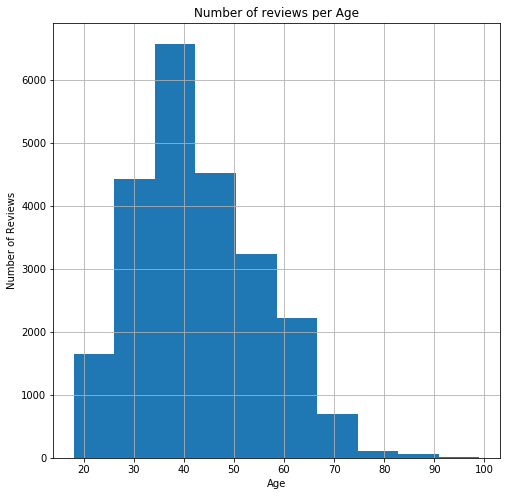

In [115]:
plt.figure(figsize=(8,8))
plt.hist(df.Age)
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Number of Reviews")
plt.title("Number of reviews per Age")

Text(0.5, 1.0, 'Number of reviews per Rating')

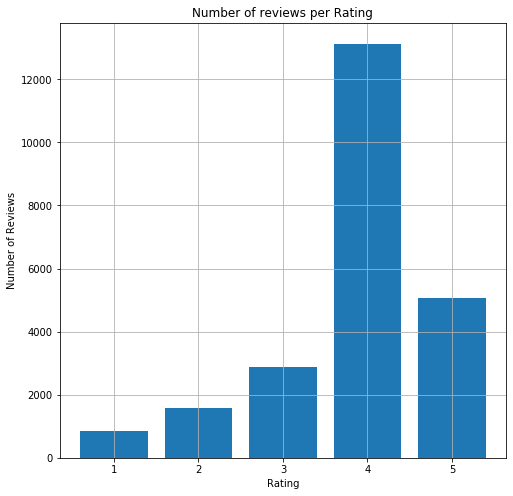

In [89]:
d= df["Rating"].value_counts()
plt.figure(figsize=(8,8))
plt.grid(True)
plt.bar(df["Rating"].unique(),d)
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Number of reviews per Rating")

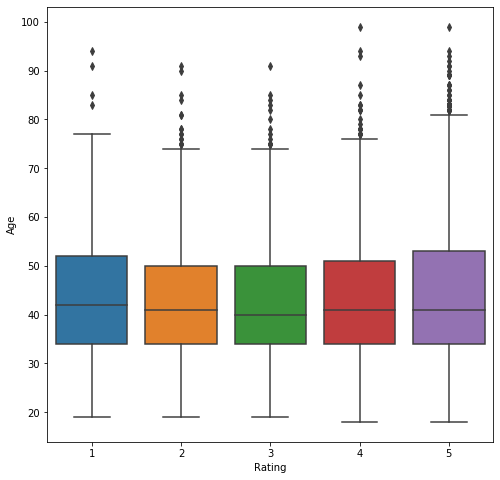

In [90]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'Rating', y = 'Age', data = df)

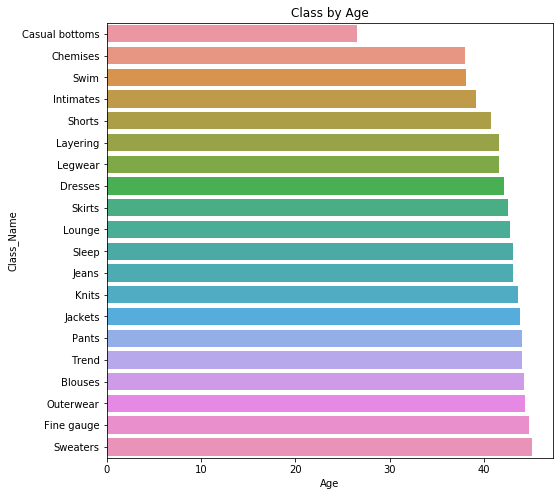

In [91]:
age = df[['Class_Name','Age']].groupby('Class_Name').mean().sort_values(by='Age')
age
plt.figure(figsize=(8,8))
plt.title('Class by Age')
sns.barplot(y=age.index, x=age['Age'])

C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 576x576 with 0 Axes>

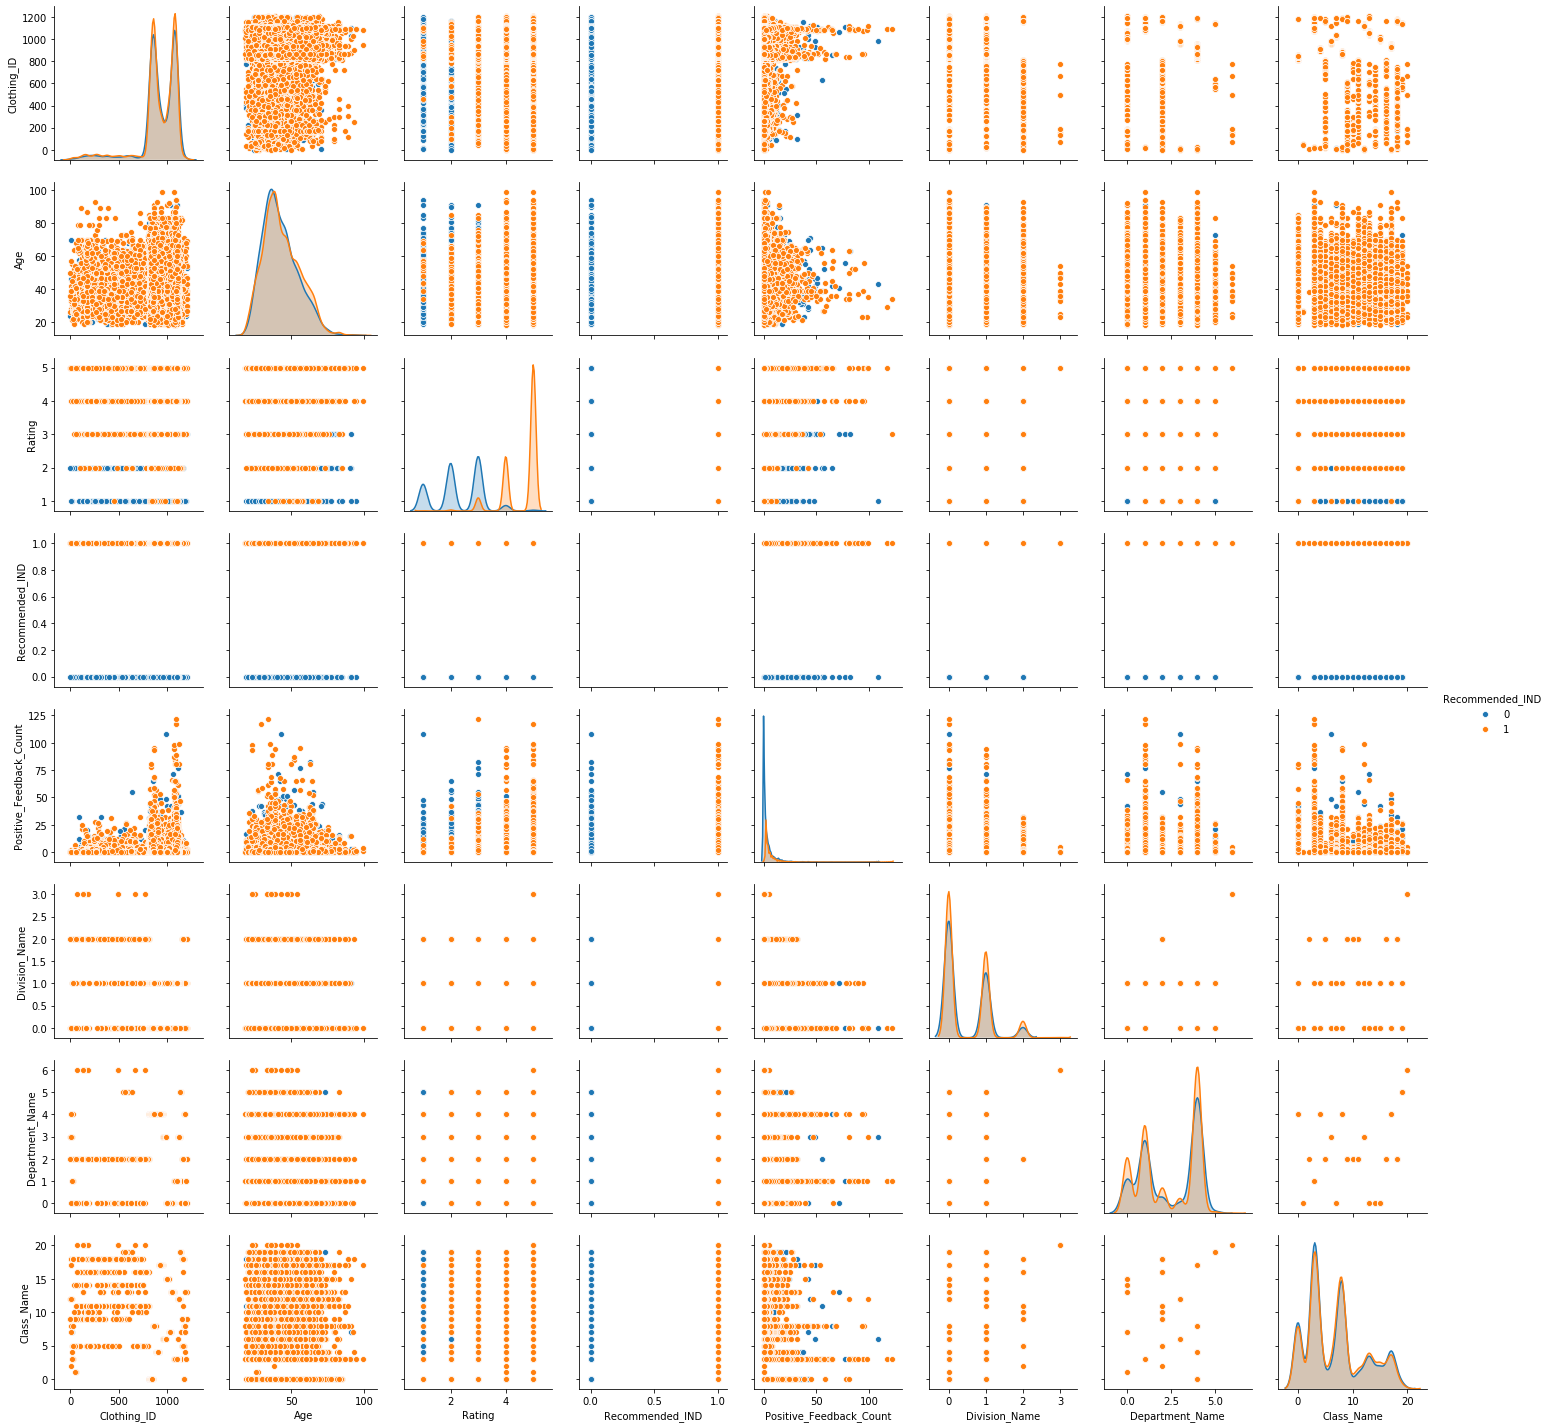

In [235]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df,hue='Recommended_IND')

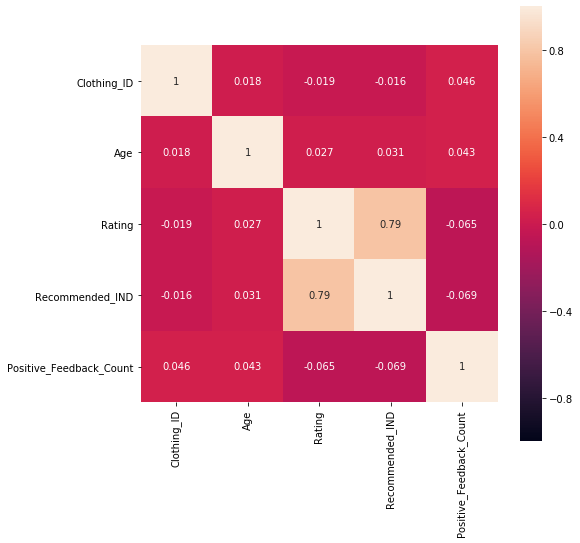

In [93]:
corrmat = df.corr()
fig = plt.figure(figsize = (8,8))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

In [210]:
X = df.drop('Recommended_IND', axis =1)
y = df['Recommended_IND']

In [211]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [212]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\Sooyeon Choi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [213]:
score = logreg.score(X,y)
score

0.9240824320872009

In [214]:
cfmatrix = metrics.confusion_matrix(y_test, y_pred)
cfmatrix

array([[ 754,  272],
       [ 166, 4680]], dtype=int64)

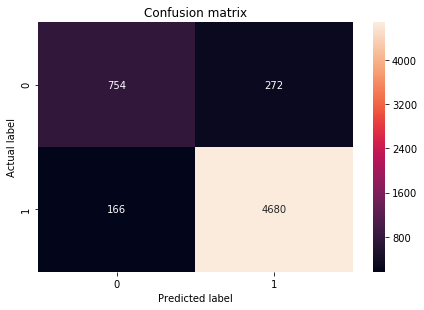

In [215]:
sns.heatmap(pd.DataFrame(cfmatrix), annot=True,fmt='2g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [216]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9254087193460491
Precision: 0.9450726978998385
Recall: 0.9657449442839455


In [217]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
dtc

DecisionTreeClassifier()

In [218]:
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9139986376021798


In [219]:
cfmatrix = metrics.confusion_matrix(y_test, y_pred)
cfmatrix

array([[ 782,  244],
       [ 261, 4585]], dtype=int64)

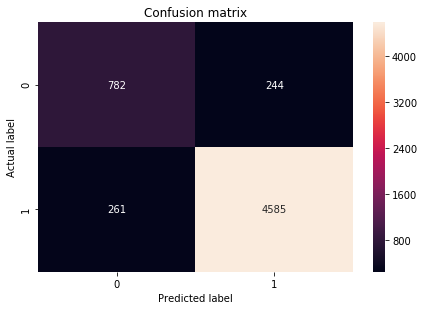

In [220]:
sns.heatmap(pd.DataFrame(cfmatrix), annot=True,fmt='2g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [221]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9139986376021798
Precision: 0.949471940360323
Recall: 0.9461411473380107


In [222]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [223]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9293256130790191


In [224]:
cfmatrix = metrics.confusion_matrix(y_test, y_pred)
cfmatrix

array([[ 857,  169],
       [ 246, 4600]], dtype=int64)

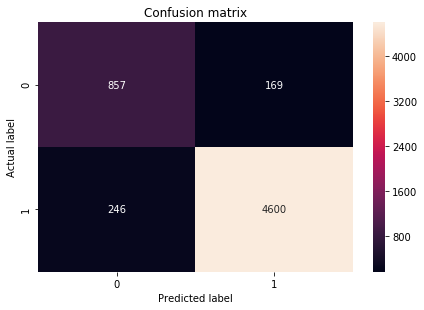

In [225]:
sns.heatmap(pd.DataFrame(cfmatrix), annot=True,fmt='2g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [226]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9293256130790191
Precision: 0.9645628014258755
Recall: 0.9492364836978952


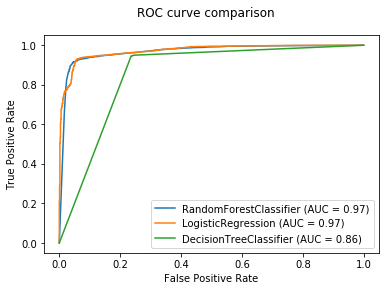

In [234]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

clf.fit(X_train, y_train)
clf_disp = metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
logreg_disp = metrics.plot_roc_curve(logreg, X_test, y_test, ax = clf_disp.ax_)  # doctest: +SKIP
dtc_disp = metrics.plot_roc_curve(dtc, X_test, y_test, ax = clf_disp.ax_)  # doctest: +SKIP

clf_disp.figure_.suptitle("ROC curve comparison")
plt.show()